<a href="https://colab.research.google.com/github/Ivanpillow/Clasificacion-Inteligente-de-Datos/blob/main/Hands-on%201%3A%20Perceptron%20Notebook%20(Tutorial)/Hands_on_1_PerceptronNotebook_DIHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hans-On 1 Perceptron Notebook

Nombre: Diego Iván Hernández Muñoz

Profesor: Jose Antonio Aviña Mendez

Materia: Clasificacion inteligente de datos

# 1.1 Fundamentos del clasificador lineal Perceptrón

A grandes rasgos el perceptrón es una neurona artificial, fundamental para las redes neuronales dentro del Deep Learning.

De manera más especifica esta unidad de red neuronal es un algoritmo para el aprendizaje supervisado de clasificadores binarios. Este algoritmo permite que las neuronas artificiales aprendan y traten los elementos de una serie de datos.

De manera breve su regla de aprendizaje se trata de enseñar automaticamente los coeficientes de peso óptimos. Donde el perceptrón recibe múltiples señales de entrada. Si la suma de las señales supera un umbral determinado, se produce una señal o, por el contrario, no se emite ningún resultado.

# 1.2 Modelo matemático del Perceptrón

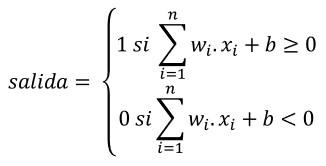

​Básicamente esta formula general se expresa así:

xi: es el valor de entrada.

wi: pesos asociados a cada entrada.

b: bias, este valor se ajusta al umbral de decisión.

Sumatoria de xi y wi: suma ponderada de las entradas.

#### Visualmente se explica de la siguiente manera:

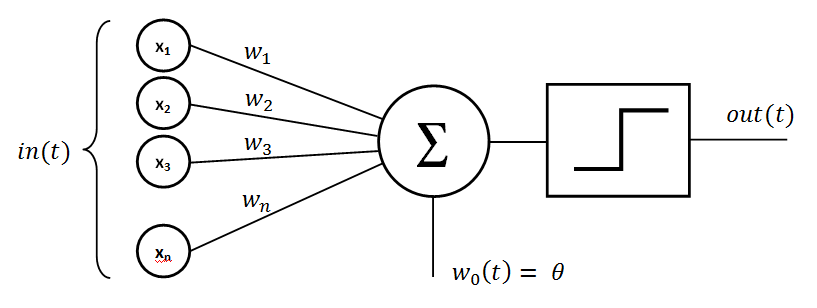

Ese valor puede ser positivo o negativo. La neurona artificial se activa si el valor es positivo. Solo se activa si el peso calculado de los datos de entrada supera un umbral determinado.

El resultado predicho se compara con el resultado conocido. En caso de diferencia, el error se retropropaga para permitir ajustar los pesos.

# 1.3 Descripción de librerias

In [20]:
import numpy as np  # Con numpy manejaré matrices y realizaré operaciones vectoriales
from sklearn.datasets import make_classification  # Con make es que generaré el dataset para clasificación
from sklearn.linear_model import Perceptron  # Modelo de perceptrón
from sklearn.model_selection import train_test_split  # Para dividir los conjuntos de datos
from sklearn.metrics import accuracy_score  # Para calcular la Métrica Accuracy
import matplotlib.pyplot as plt  # Para graficar los resultados y que sea visual
import warnings

# 1.4 Pipeline

## 1.4.1 Feature Engineering

El dataset será creado mediante el generador "make_clasification" de sklearn:

Lo mínimo necesario es especificar el tamaño en Samples, las caracteristicas (features) a generar dependiendo el tamaño, cuantas features serán informativas o usables, el número de clases a hacer, y el generador aleatorio de random_state.

Las especifícaciones extras que utilicé en lel generador son para mejorar su limpieza al crearlo y utilizarlo.

In [21]:
X, y = make_classification(
    n_samples=150,      # Las observaciones, solo 150 para demostrar funcionalidad
    n_features=2,       # Solo dos características por la gráfica 2D
    n_redundant=0,
    n_informative=2,    # Solo necesito dos características útiles
    n_clusters_per_class=1,
    random_state=42     # Semilla generadora para que sea random y constante
)

# 3 líneas del dataset generado
print(X[:3])
print("Clases:", np.unique(y))

[[ 0.82986569  1.49158587]
 [ 0.38725495  2.50660471]
 [-1.44396659  1.14914275]]
Clases: [0 1]


Separadas en solo dos variables (0, 1) para probar esta clasificación lineal, mostré solo tres líneas de datos para saber si fue exitosa la generación.

## 1.4.2 Model Selection

Al ser un modelo lineal simple, es capaz de aprender una frontera de decisión lineal y por ello funciona bien cuando los datos son aproximadamente separables como los que generé.

Además de ser bueno por el entrenamiento es rápido y fácil de interpretar con el ajuste de pesos + bias.

## 1.4.3 Model Training

In [22]:
# División del dataset en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Ahora se crea el modelo del perceptrón
perceptron = Perceptron(max_iter=100, eta0=0.01, random_state=42)

# Y se entrena el modelo con la función fit
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.01, max_iter=100, random_state=42)

Mediante esta función de fitting el Perceptrón ajusta los pesos y sesgo en función de los errores cometidos.

## 1.4.4 Prediction

La variable predict(X) devuelve la clase estimada por el modelo para cada muestra y se imprime una comparación entre la clase predicha y la clase real, verificando si el Perceptrón clasificó correctamente los patrones.

In [23]:
# Con esta función se verifican las predicciones del modelo
def prueba_patrones(modelo, X, y):
    predicciones = modelo.predict(X)
    for i in range(len(X)):
        print(f"Variables: {X[i]} | Predicción: {predicciones[i]} | Clase real: {y[i]}")
    return predicciones

# Se prueba en los datos generados
print("Resultados de la predicción:")
y_pred = prueba_patrones(perceptron, X_test, y_test)

Resultados de la predicción:
Variables: [-2.44725341  0.2184795 ] | Predicción: 0 | Clase real: 0
Variables: [0.31047055 1.56990417] | Predicción: 1 | Clase real: 0
Variables: [0.63976028 1.91271347] | Predicción: 1 | Clase real: 1
Variables: [-1.47260314  0.15052838] | Predicción: 0 | Clase real: 0
Variables: [0.96671276 1.19004499] | Predicción: 1 | Clase real: 1
Variables: [ 2.15580497 -1.67438157] | Predicción: 1 | Clase real: 1
Variables: [-0.00109117  0.89028863] | Predicción: 0 | Clase real: 0
Variables: [1.03750864 0.67035153] | Predicción: 1 | Clase real: 1
Variables: [1.12633936 0.61887483] | Predicción: 1 | Clase real: 1
Variables: [0.73774733 1.26159949] | Predicción: 1 | Clase real: 0
Variables: [-0.48686247  1.93888163] | Predicción: 0 | Clase real: 0
Variables: [-0.358516    4.60391634] | Predicción: 1 | Clase real: 1
Variables: [0.85153546 1.42293316] | Predicción: 1 | Clase real: 1
Variables: [0.20165997 3.19715643] | Predicción: 1 | Clase real: 1
Variables: [ 1.337819

## 1.4.5 Model Evaluation

Ahora como se indica, con "accuracy" se mide el porcentaje de predicciones correctas

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy) del Perceptrón: {accuracy:.2f}")

# Son los pesos y el bias aprendidos
print(f"Pesos: {perceptron.coef_}")
print(f"Bias: {perceptron.intercept_}")

Precisión (Accuracy) del Perceptrón: 0.93
Pesos: [[0.0512447  0.01708553]]
Bias: [-0.04]


## Gráfica

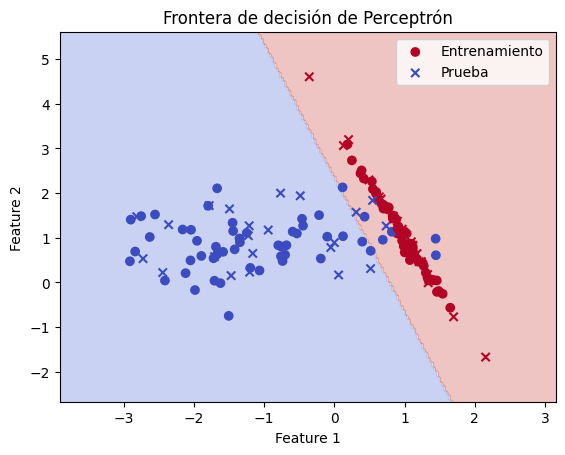

In [25]:
warnings.filterwarnings("ignore")

# Los limites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ahora se genera la gráfica de este scatter plot pero con la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, marker='o', label='Entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x', label='Prueba')

plt.title("Frontera de decisión de Perceptrón")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 1.5 Bibliografía





*   Formulación matemática del Perceptrón | Interactive Chaos. (2025). Interactivechaos.com. https://interactivechaos.com/es/manual/tutorial-de-machine-learning/formulacion-matematica-del-perceptron

*   rédac, T. (2022, March 7). Perceptron : qu’est-ce que c’est et à quoi ça sert ? Formation Data Science | DataScientest.com. https://datascientest.com/es/perceptron-que-es-y-para-que-sirve

*   sklearn.linear_model.Perceptron. (n.d.). Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

*  Singh , Y. (2022, July 3). How to Generate Datasets Using make_classification | Proclus Academy. @_yashmeet. https://proclusacademy.com/blog/sklearn_make_classification/
